# Timing Python code

In [1]:
def f(n):
    a = 0
    for i in range(100_000 * n):
        a += i
    return a

In [2]:
%time f(30)

CPU times: user 175 ms, sys: 4.38 ms, total: 180 ms
Wall time: 181 ms


4499998500000

In [3]:
# also demos use of varargs!
import time
def gettime(f, *args):
    "Return time in seconds; %time, %timeit don't work in functions so we write our own"
    t0 = time.time()
    f(*args)
    t1 = time.time()
    return t1 - t0

In [13]:
t = gettime(f, 30) # call f(30)
print(f"{t:.3f}s")

0.182s


## Profiling

In [17]:
def g(n):
    for i in range(20):
        f(n)
    return None
    
def f(n):
    a = 0
    for i in range(100_000 * n):
        a += i
    return a

# in the output look for calls to f and g:
# <ipython-input-10-f95a342f71e7>:4(f)
# and
# <ipython-input-10-f95a342f71e7>:1(g)
%prun g(30)

         24 function calls in 3.057 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       20    3.057    0.153    3.057    0.153 <ipython-input-17-4989738166fa>:6(f)
        1    0.000    0.000    3.057    3.057 <ipython-input-17-4989738166fa>:1(g)
        1    0.000    0.000    3.057    3.057 {built-in method builtins.exec}
        1    0.000    0.000    3.057    3.057 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

## Plotting time vs work

In [24]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg') # png sucks
def showtime(f, n, step=1):
    times = [gettime(f, i) for i in range(1,n,step)]
    plt.figure(figsize=(4,3))
    plt.plot(range(1,n,step), times, '.', color='#fdae61', alpha=.9, markersize=15, markeredgewidth=.5, markeredgecolor='black')
    plt.xlabel("Problem size")
    plt.ylabel("Time in seconds")
    plt.show()

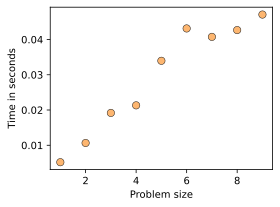

In [25]:
showtime(f,10)

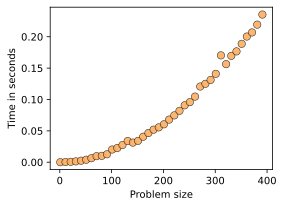

In [26]:
def g(n):
    a = 0
    for i in range(10*n):
        zeroes = [0 for j in range(i)]
        a += len(zeroes)
    return a

showtime(g,400,step=10)

# Misc

In [34]:
def log2(n):
    if n <= 1:
        return 0
    count = 0
    while n > 0:
        n = n//2
        count += 1
    return count-1
print( log2(2), log2(32) )

1 5


In [46]:
# Define macro %mytime to run something once and return a TimeitResult object
%alias_magic mytime --line timeit -p "-n 1 -r 5"

Created `%mytime` as an alias for `%timeit -n 1 -r 5`.


In [47]:
%mytime log2(32)

847 ns ± 463 ns per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [48]:
%mytime log2(1000)

1.05 µs ± 444 ns per loop (mean ± std. dev. of 5 runs, 1 loop each)
